In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_table('../extracted/extracted_multi_face.csv', delimiter=',')
df.fillna('', inplace=True)
print(df)
emo_df = pd.read_table('../au_to_emotion.csv', delimiter=',', names=('Emotion', 'Cor', 'Kel', 'Du', 'PhyDes'))
emo_df = emo_df.iloc[1: , :]
emos = pd.array(emo_df['Emotion'], dtype="string")

      Unnamed: 0  frame  face_id               Cordaro   Keltner  \
0              0      1        0                                   
1              1      1        1              Surprise  Surprise   
2              2      1        2                                   
3              3      2        0                                   
4              4      2        1                                   
...          ...    ...      ...                   ...       ...   
2090        2090    701        1                                   
2091        2091    701        2                                   
2092        2092    702        0  Pride, Embarrassment             
2093        2093    702        1                                   
2094        2094    702        2  Pride, Embarrassment             

                                      Du  
0                                         
1     Awe, Surprise, Fearfully Surprised  
2                                         
3          

In [4]:
# df2 = df.groupby('face_id')
# print(df)
# per_cor = [pd.DataFrame() for emo in emos]
n_frames = df['frame'].max()
n_faces = df['face_id'].max() + 1
per = []
print(emos)
# df['Cordaro'] == "Surprise"
# df2.count()
# emo = "Surprise"
# print(df['Cordaro'].str.find(emo))
i = 0
for emo in emos:
# emo = "Amusement"
    filter1 = df['Cordaro'].str.find(emo) != -1
    filter2 = df['Keltner'].str.find(emo) != -1
    filter3 = df['Du'].str.find(emo) != -1

    copy = df
    #     print(copy)
    #     print(df)
    cordf = copy.loc[filter1]
    foo1 = cordf.groupby('face_id').count()
#     print(newdf)
    foo1 = foo1.add_suffix('_').reset_index()
    cordf1 = foo1[['face_id','Cordaro_']]
#     print(cordf1)
    
    keldf = copy.loc[filter2]
    foo2 = keldf.groupby('face_id').count()
    foo2 = foo2.add_suffix('_').reset_index()
    keldf1 = foo2[['face_id','Keltner_']]
    
    dudf = copy.loc[filter3]
    foo3 = dudf.groupby('face_id').count()
    foo3 = foo3.add_suffix('_').reset_index()
    dudf1 = foo3[['face_id','Du_']]
    
    result = pd.merge(cordf1, keldf1,how="outer", on="face_id")
    result = pd.merge(result, dudf1,how="outer", on="face_id")
    per.append(result)
    print(result)
    #     print(per_cor[i])
    #     .groupby('face_id').count()
    #     per_kel[i] = df.groupby('face_id').where(df['Keltner'].find(emo) != -1).count()
    #     per_du[i] = df.groupby('face_id').where(df['Du'].find(emo) != -1).count()
    i += 1
# print(copy)


<StringArray>
[            'Amusement',             'Happiness',                   'Awe',
                 'Pride',              'Surprise',                 'Anger',
              'Confused',              'Contempt',               'Disgust',
         'Embarrassment',                  'Fear',                  'Pain',
                 'Shame',              'Interest',               'Sadness',
     'Happily Surprised',     'Happily Disgusted',         'Sadly Fearful',
           'Sadly Angry',       'Sadly Surprised',       'Sadly Disgusted',
       'Fearfully Angry',   'Fearfully Surprised',   'Fearfully Disgusted',
     'Angrily Surprised',     'Angrily Disgusted', 'Disgustedly Surprised',
       'Appalled/Hatred']
Length: 28, dtype: string
   face_id  Cordaro_  Keltner_  Du_
0        0        22        22  NaN
1        1         2         2  NaN
2        2        31        31  NaN
3        3         5         5  NaN
   face_id  Cordaro_  Keltner_  Du_
0        0        22        22  46

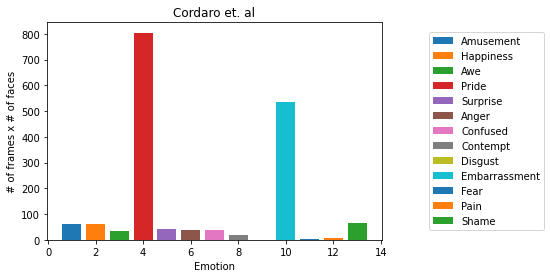

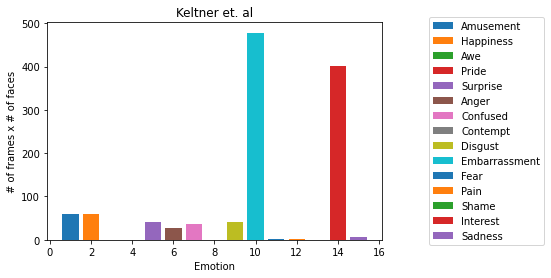

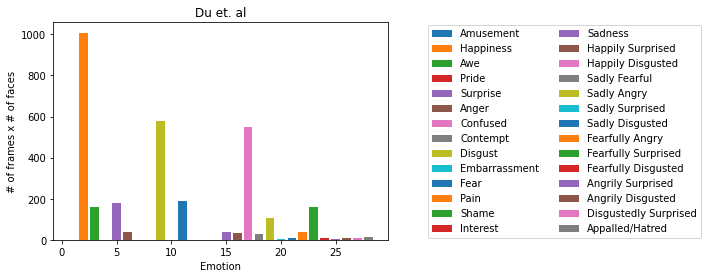

In [5]:
import matplotlib.pyplot as plt
i = 0
for emo in emos:
    if i == 13:
        break
    plt.bar([i+1],[per[i]['Cordaro_'].sum()], label=emo)
    i += 1
#     plt.bar()

# plt.bar([2,4,6,8,10],[8,6,2,5,6], label="Example two", color='g')
plt.legend(loc = 7, bbox_to_anchor=(1.5, 0.5))
plt.ylabel('# of frames x # of faces')
plt.xlabel('Emotion')

plt.title('Cordaro et. al')

plt.show()

i = 0
for emo in emos:
    if i == 15:
        break
    plt.bar([i+1],[per[i]['Keltner_'].sum()], label=emo)
    i += 1
#     plt.bar()

# plt.bar([2,4,6,8,10],[8,6,2,5,6], label="Example two", color='g')
plt.legend(loc = 7, bbox_to_anchor=(1.5, 0.5))
plt.ylabel('# of frames x # of faces')
plt.xlabel('Emotion')

plt.title('Keltner et. al')

plt.show()

i = 0
for emo in emos:
    plt.bar([i+1],[per[i]['Du_'].sum()], label=emo)
    i += 1
#     plt.bar()

# plt.bar([2,4,6,8,10],[8,6,2,5,6], label="Example two", color='g')
plt.legend(loc = 7, bbox_to_anchor=(1.95, 0.5), ncol = 2)
plt.ylabel('# of frames x # of faces')
plt.xlabel('Emotion')

plt.title('Du et. al')

plt.show()

In [6]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


[3.133903133903134, 0.2849002849002849, 4.415954415954416, 0.7122507122507122]


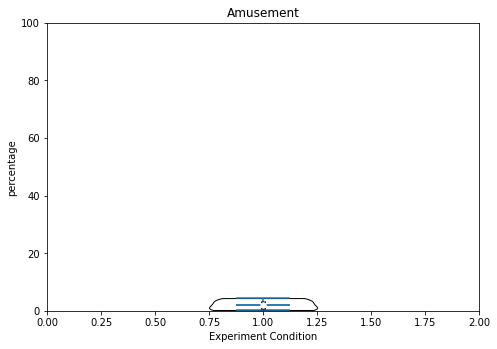

[3.133903133903134, 0.2849002849002849, 4.415954415954416, 0.7122507122507122]


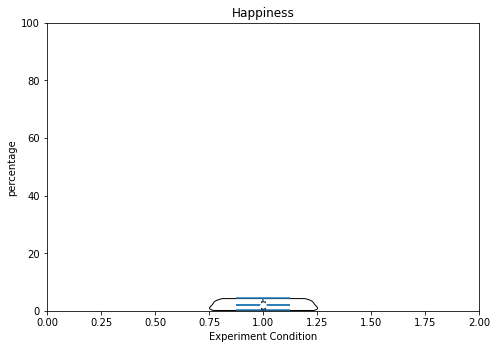

[0.14245014245014245, 2.421652421652422, 1.9943019943019944, 0.14245014245014245]


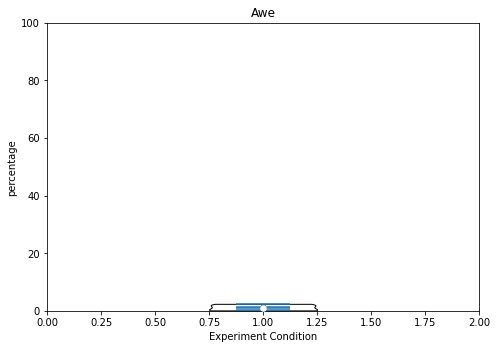

[75.92592592592592, 8.262108262108262, 19.65811965811966, 10.683760683760683]


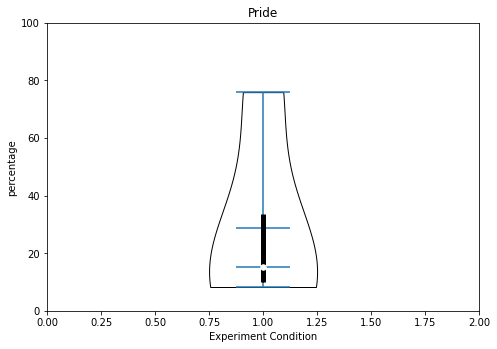

[0.2849002849002849, 2.849002849002849, 2.1367521367521367, 0.42735042735042733]


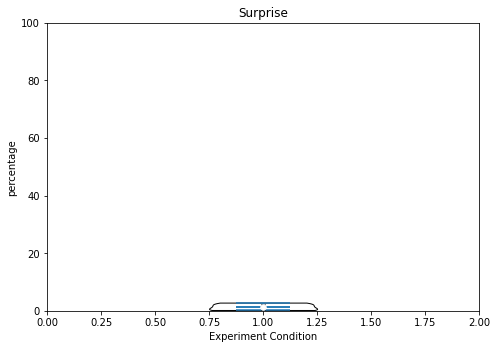

[0.2849002849002849, 1.7094017094017093, 1.7094017094017093, 1.566951566951567]


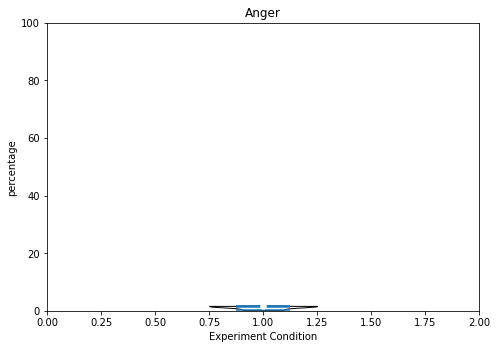

[0.2849002849002849, 1.7094017094017093, 1.7094017094017093, 1.566951566951567]


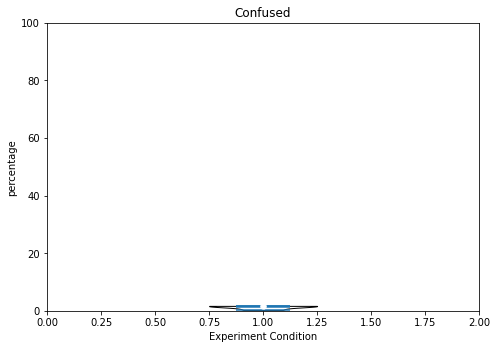

[1.1396011396011396, 1.1396011396011396, 0.5698005698005698]


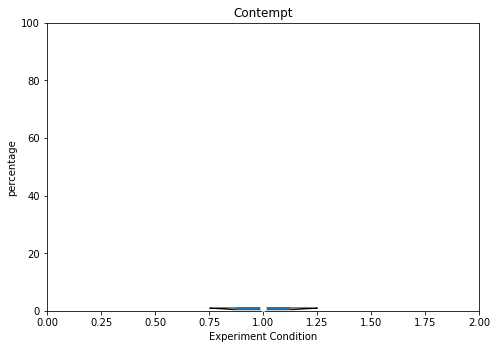

[0, 0, 0, 0]


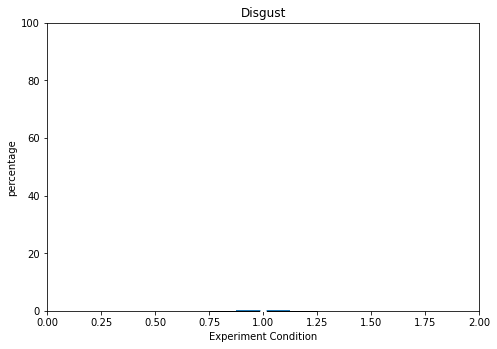

[46.43874643874644, 5.555555555555555, 14.672364672364672, 9.544159544159545]


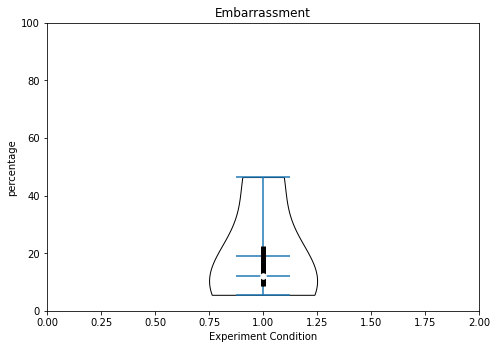

[0.2849002849002849, 0.2849002849002849, 0, 0]


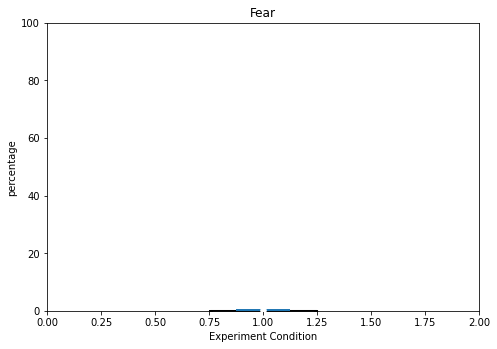

[0.2849002849002849, 0.7122507122507122]


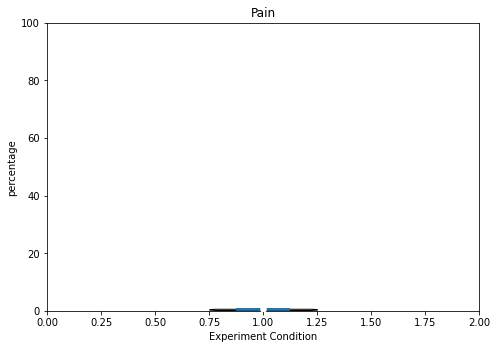

[0.14245014245014245, 3.4188034188034186, 2.5641025641025643, 3.133903133903134]


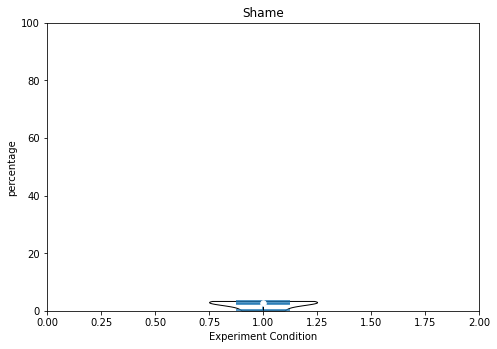

[0, 0, 0, 0]


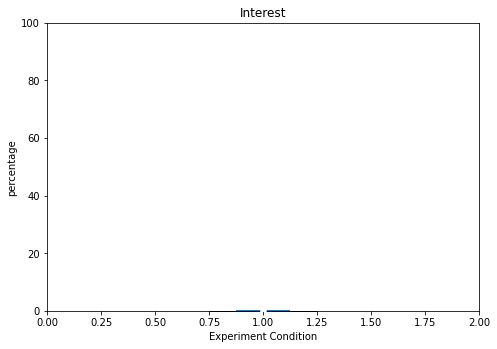

[0, 0, 0, 0]


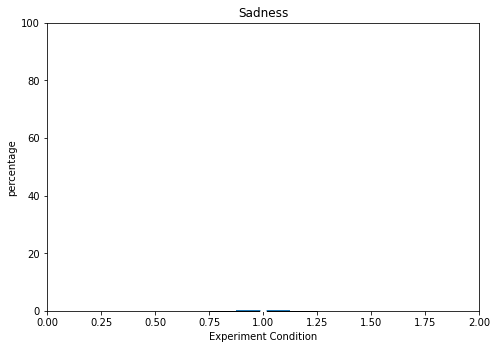

[0, 0, 0, 0]


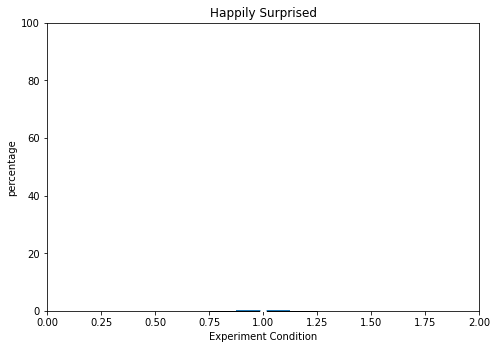

[0, 0, 0, 0]


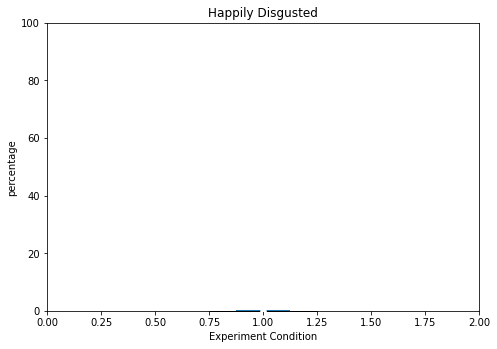

[0, 0, 0]


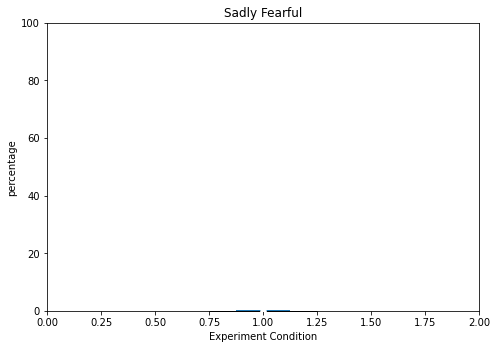

[0, 0, 0, 0]


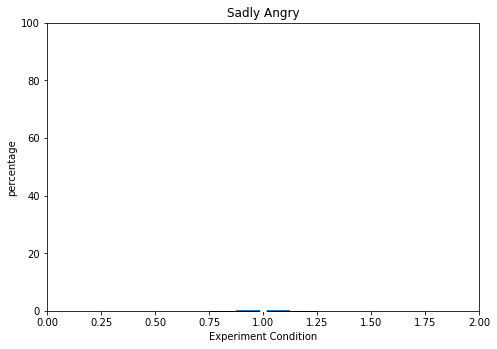

[0, 0, 0]


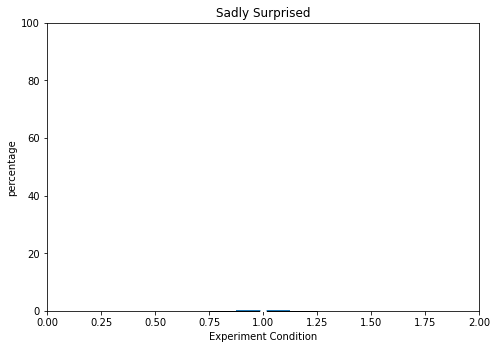

[0, 0, 0, 0]


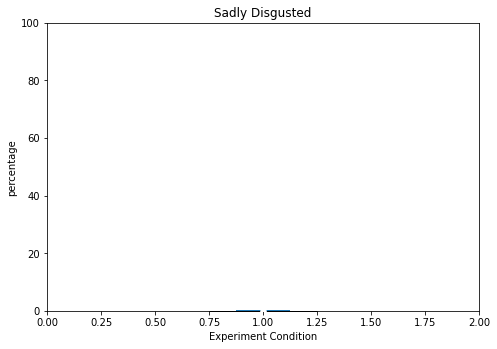

[0, 0, 0]


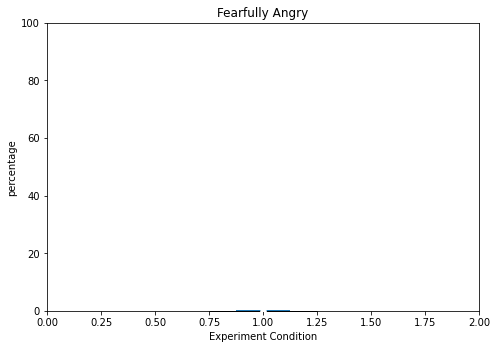

[0, 0, 0, 0]


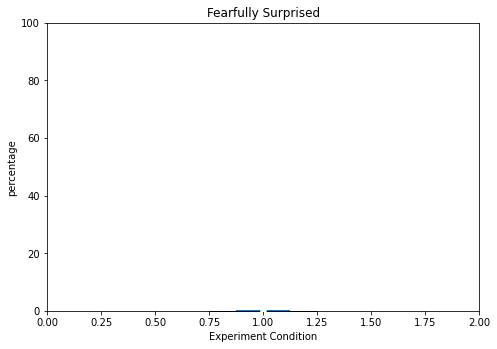

[0, 0, 0]


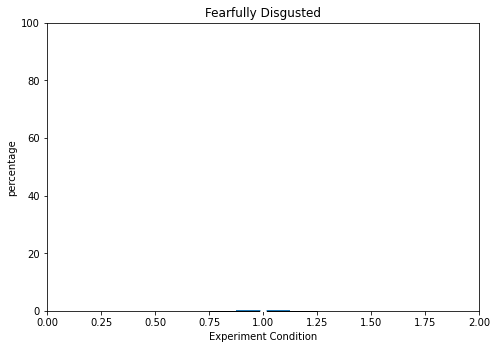

[0, 0, 0]


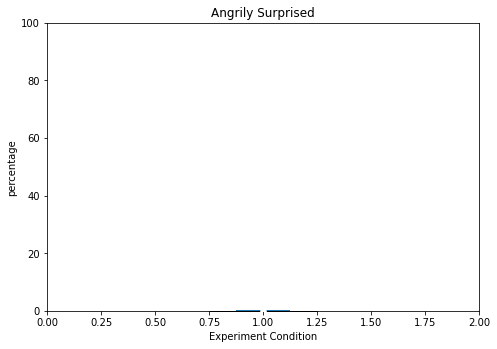

[0, 0, 0, 0]


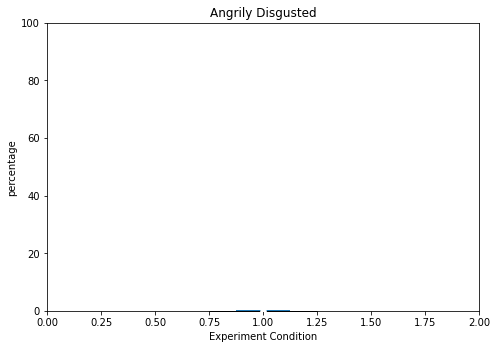

[0, 0, 0]


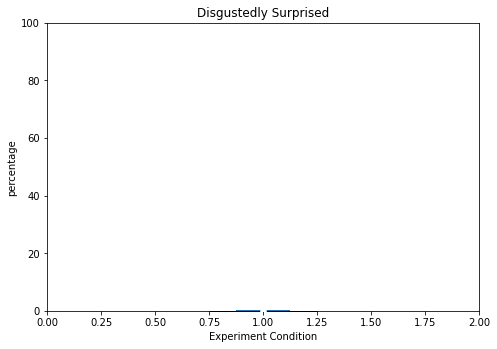

[0, 0, 0, 0]


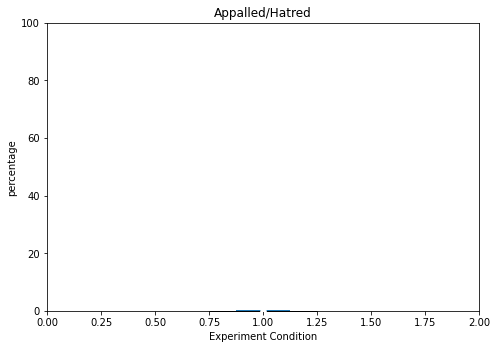

In [7]:
i = 0
# per.replace(np.nan, 0)
for emo in emos:
#     print(per[i]["Cordaro_"])
    if (per[i].empty):
        c1 = [0 for n in range(n_faces)]
    else:
        c1 = [0 if math.isnan(n) else (n*100)/n_frames for n in per[i]["Cordaro_"]]
    ## combine these different collections into a list
    print(c1)
    data_to_plot1 = [c1]
    quartile1, medians, quartile3 = np.percentile(data_to_plot1, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(data_to_plot1, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    parts = ax.violinplot(data_to_plot1, showmeans=True, showmedians=True, showextrema=True)
#     ax2.set_title('Customized violin plot')
#     parts = ax2.violinplot(
#             data, showmeans=False, showmedians=False,
#             showextrema=False)
#D43F3A
    for pc in parts['bodies']:
        pc.set_facecolor('white')
        pc.set_edgecolor('black')
        pc.set_alpha(1)

    
    ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
    plt.ylim(0, 100)
    plt.xlim(0,2)
    plt.title(emo)
    plt.xlabel("Experiment Condition")
    plt.ylabel("percentage")
    # set style for the axes
#     labels = ['A', 'B', 'C', 'D']
#     for ax in [ax1, ax2]:
#         set_axis_style(ax, labels)

#     plt.subplots_adjust(bottom=0.15, wspace=0.05)
    plt.show()
    
#     plt.show()
    i += 1

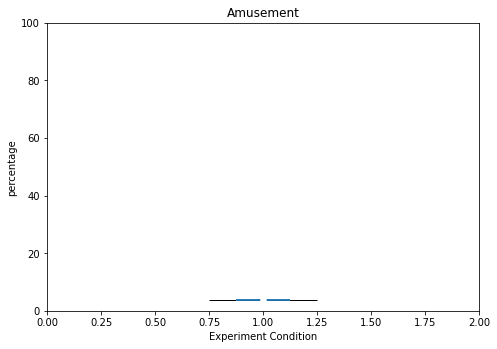

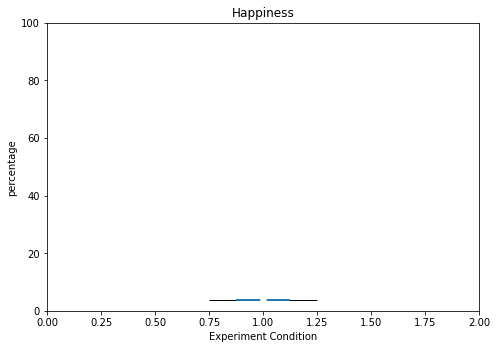

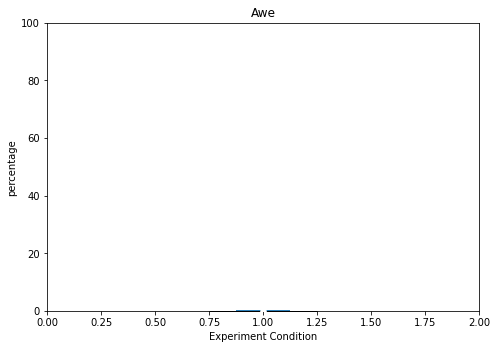

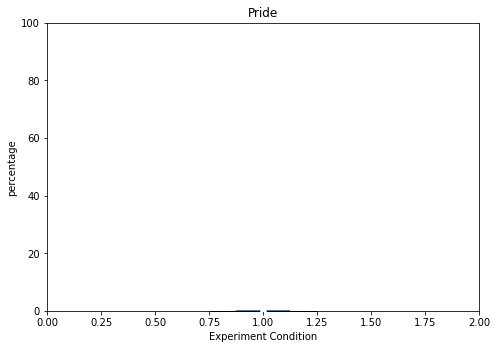

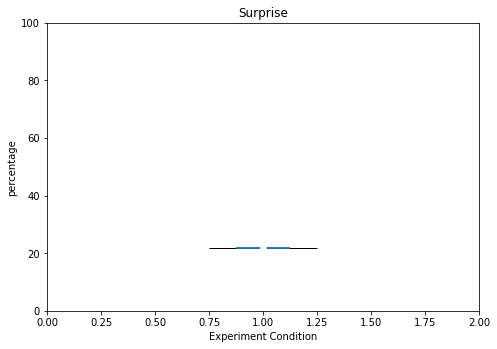

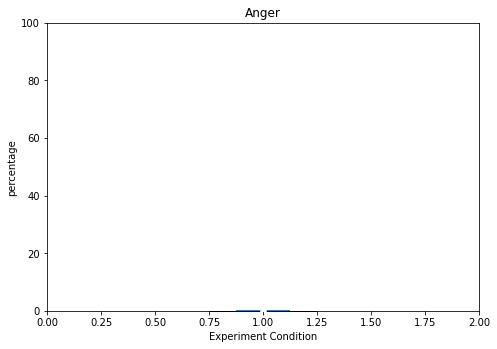

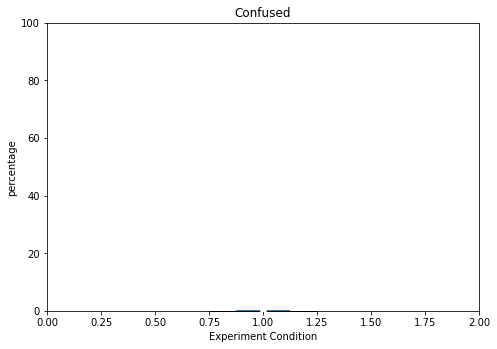

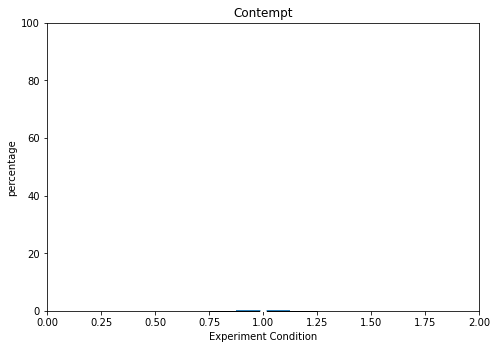

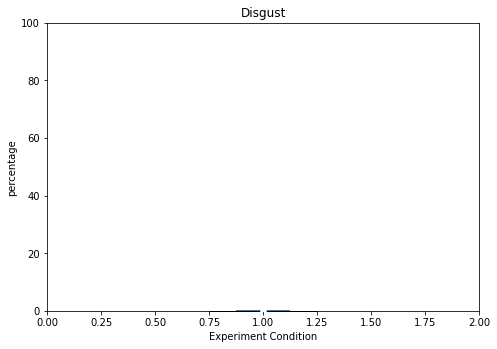

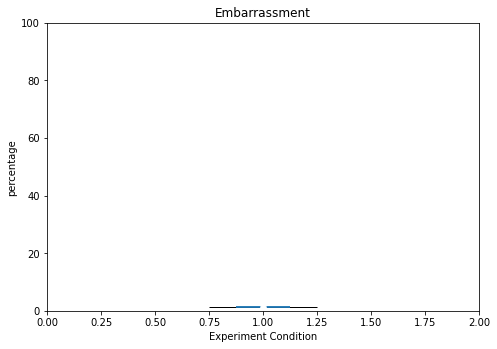

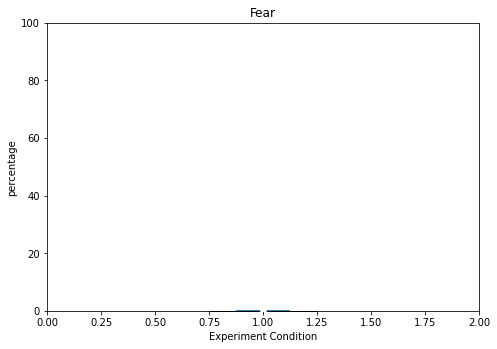

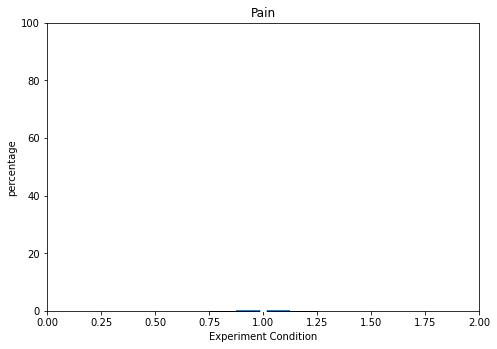

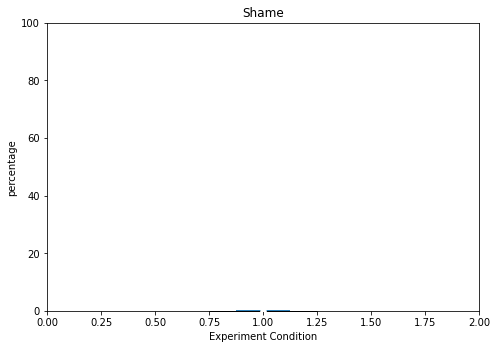

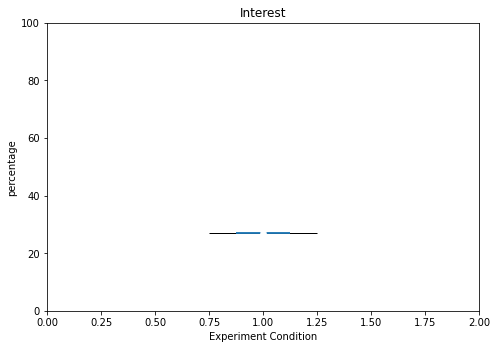

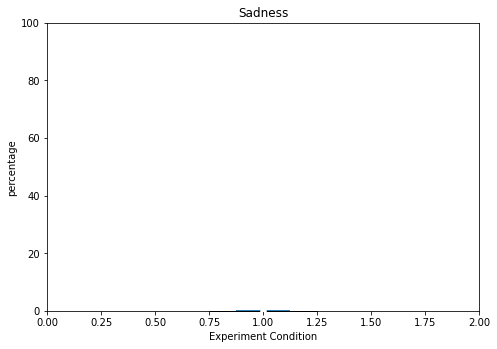

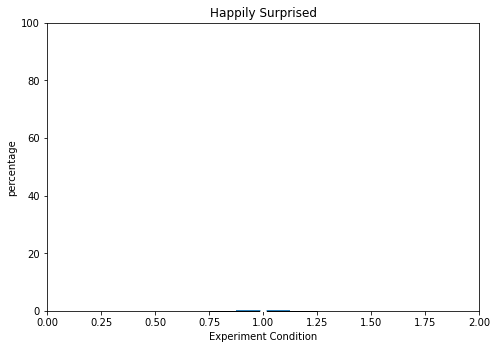

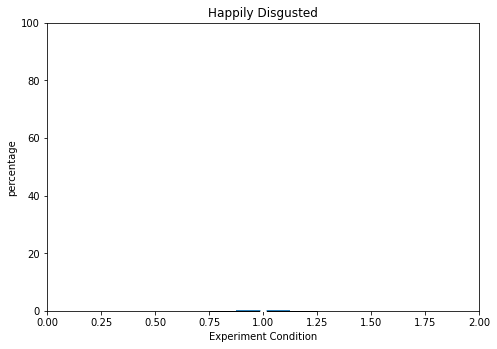

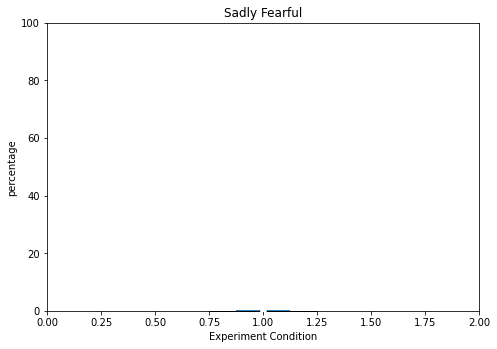

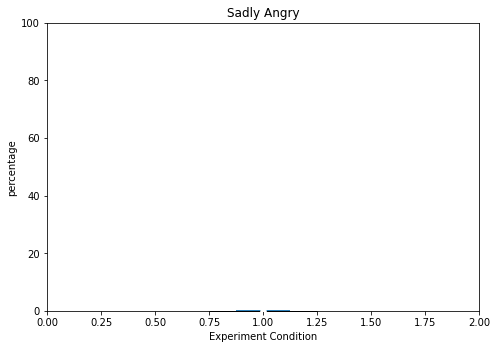

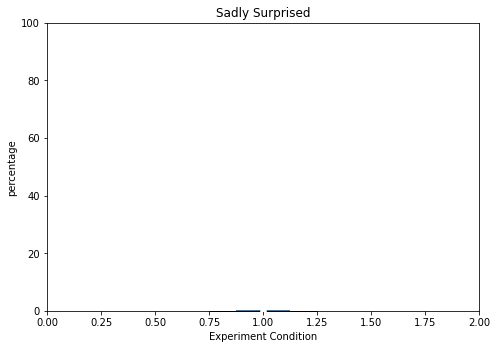

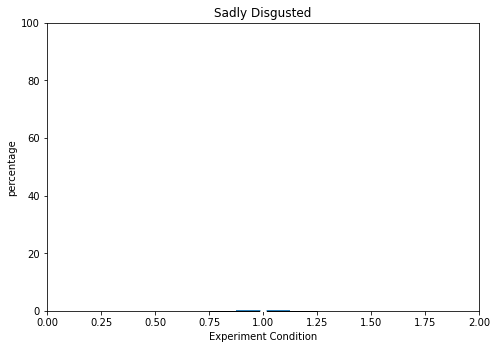

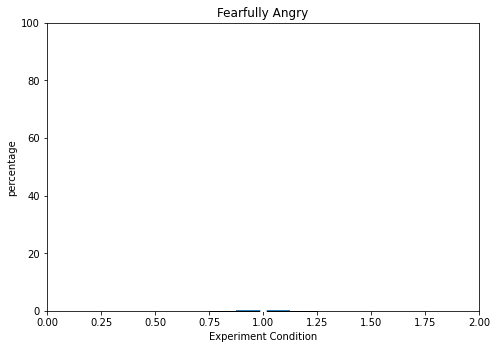

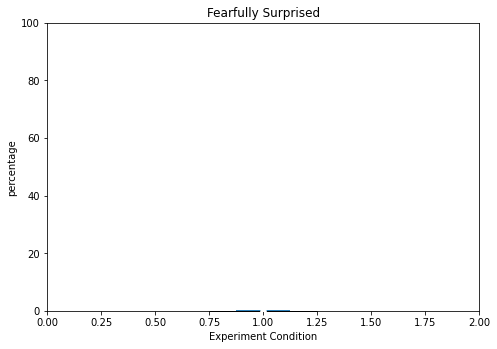

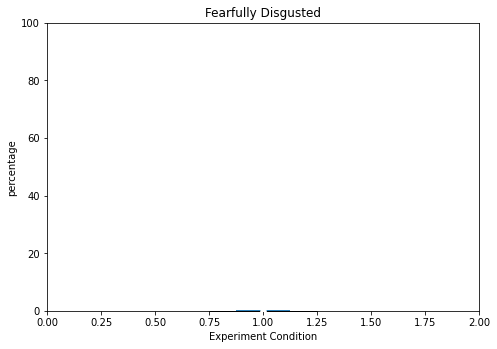

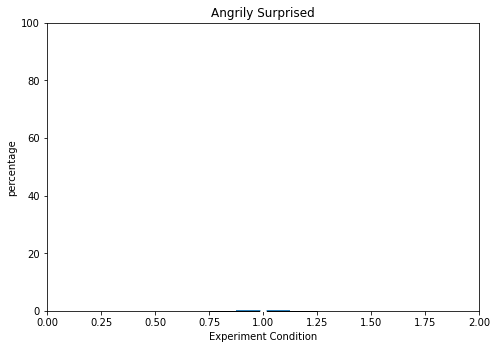

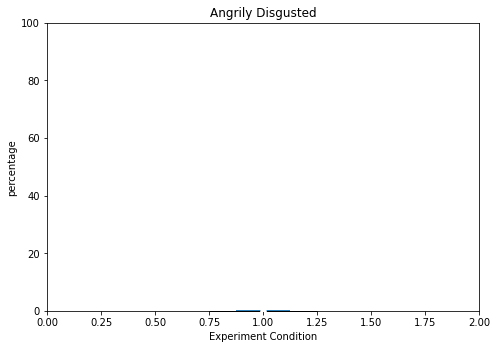

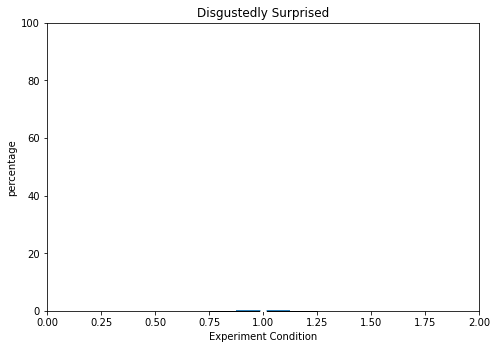

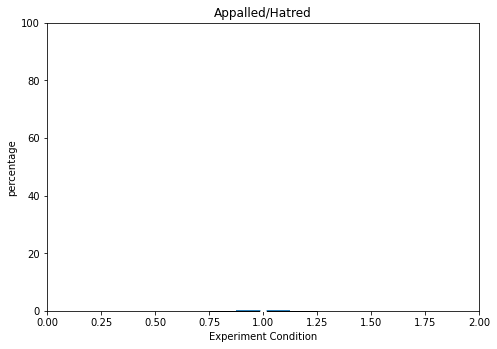

In [16]:
i = 0
for emo in emos:
    if (per[i].empty):
        c1 = [0 for n in range(n_faces)]
        c2 = [0 for n in range(n_faces)]
        c3 = [0 for n in range(n_faces)]
    else:
        c1 = [0 if math.isnan(n) else (n*100)/n_frames for n in per[i]["Cordaro_"]]
        c2 = [0 if math.isnan(n) else (n*100)/n_frames for n in per[i]["Keltner_"]]
        c3 = [0 if math.isnan(n) else (n*100)/n_frames for n in per[i]["Du_"]]
    ## combine these different collections into a list
    data_to_plot1 = [c2]
#     data_to_plot2 = [c2]
#     data_to_plot3 = [c3]

    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    parts = ax.violinplot(data_to_plot1, showmeans=False, showmedians=False, showextrema=True)
#     ax2.set_title('Customized violin plot')
#     parts = ax2.violinplot(
#             data, showmeans=False, showmedians=False,
#             showextrema=False)
#D43F3A
    for pc in parts['bodies']:
        pc.set_facecolor('white')
        pc.set_edgecolor('black')
        pc.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(data_to_plot1, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(data_to_plot1, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
    plt.ylim(0, 100)
    plt.xlim(0,2)
    plt.title(emo)
    plt.xlabel("Experiment Condition")
    plt.ylabel("percentage")
    # set style for the axes
#     labels = ['A', 'B', 'C', 'D']
#     for ax in [ax1, ax2]:
#         set_axis_style(ax, labels)

#     plt.subplots_adjust(bottom=0.15, wspace=0.05)
    plt.show()
    
#     plt.show()
    i += 1

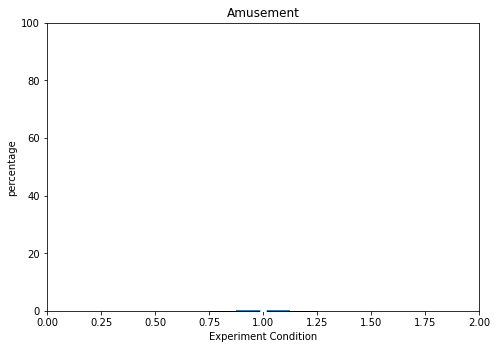

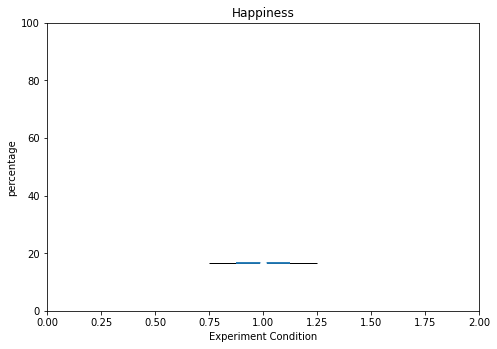

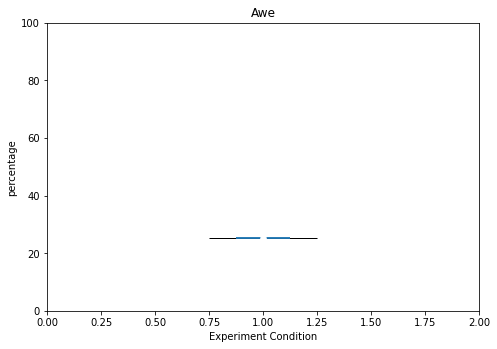

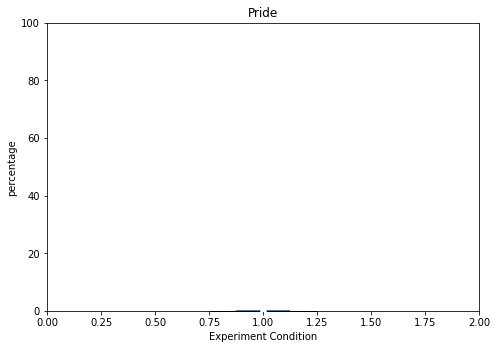

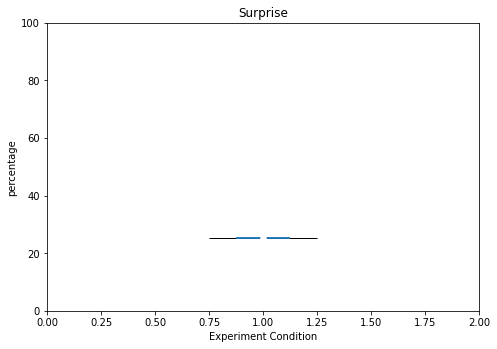

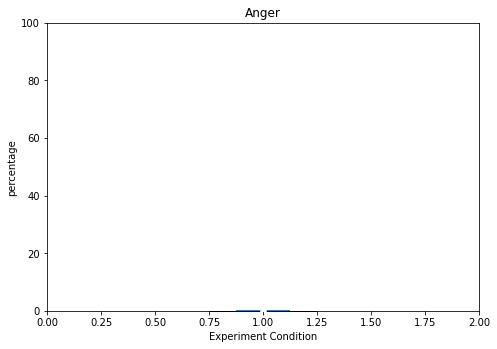

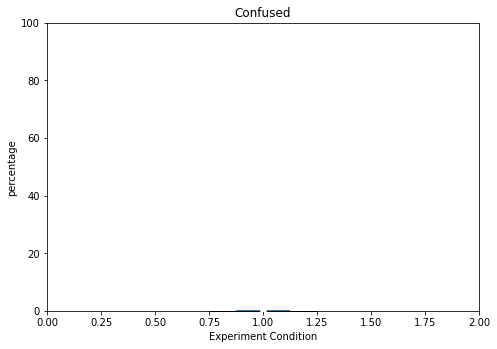

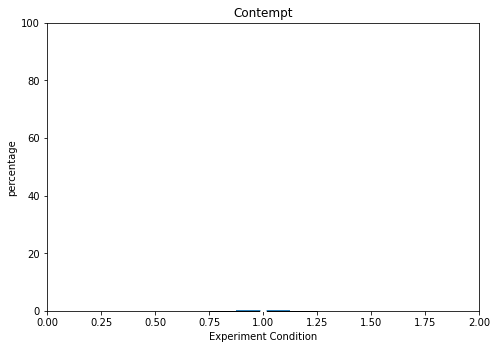

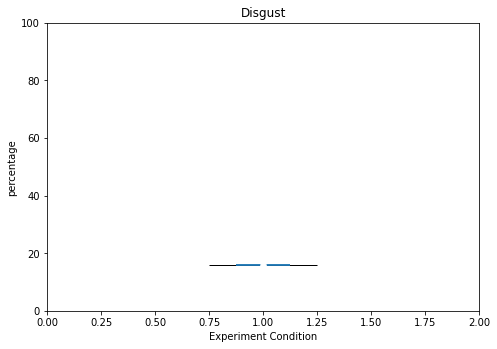

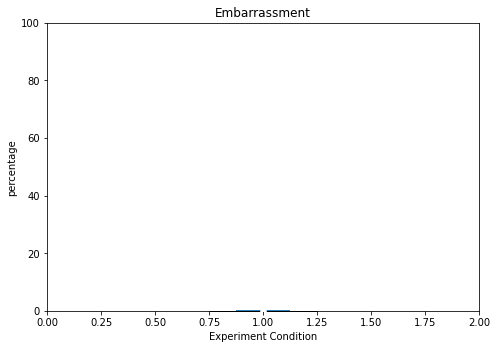

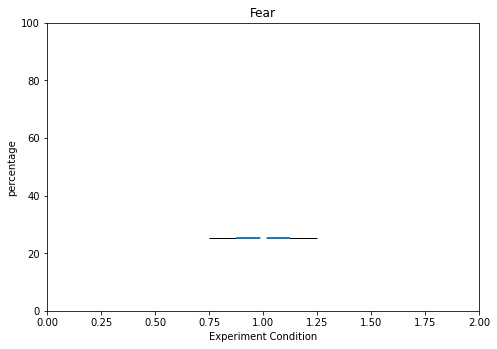

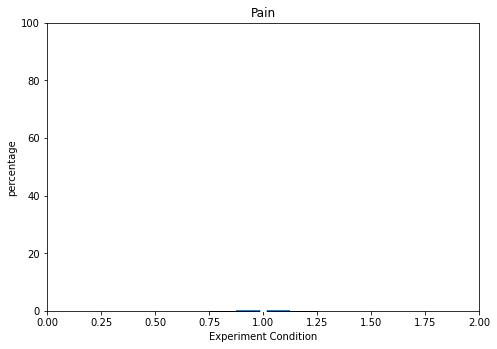

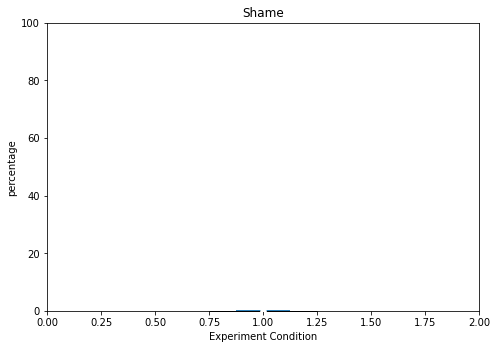

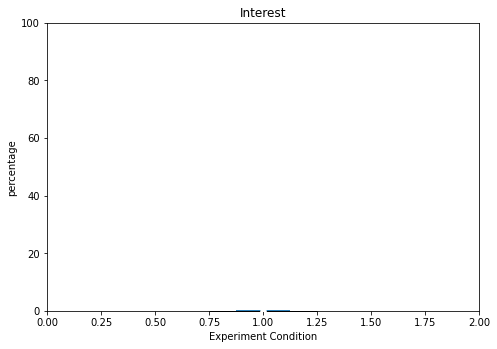

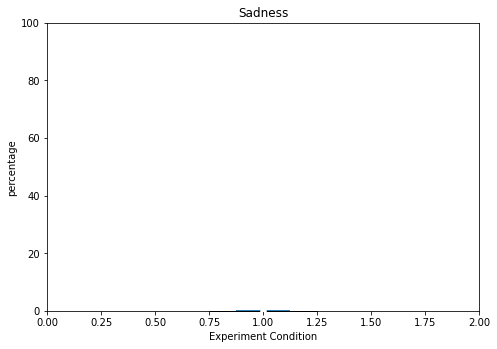

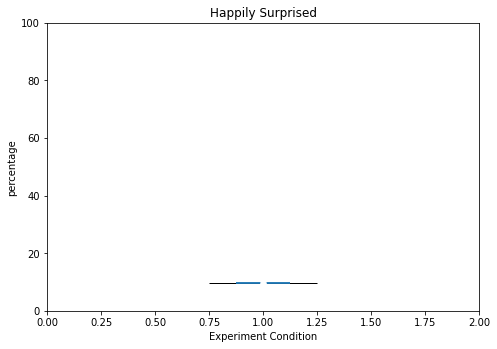

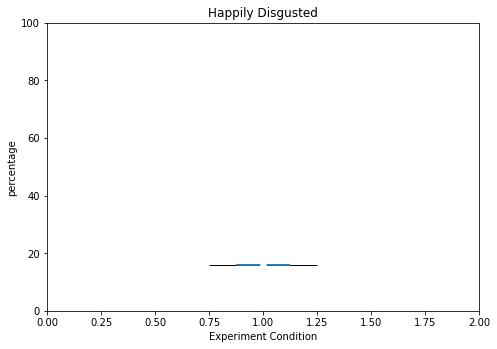

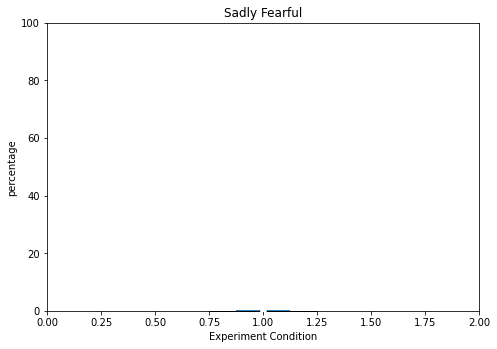

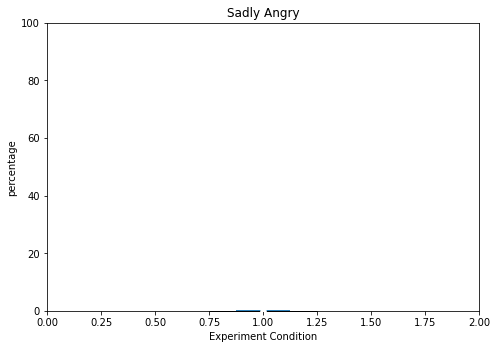

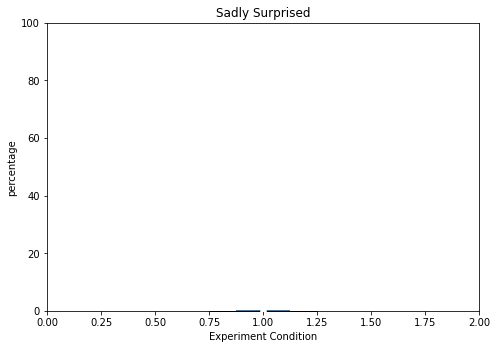

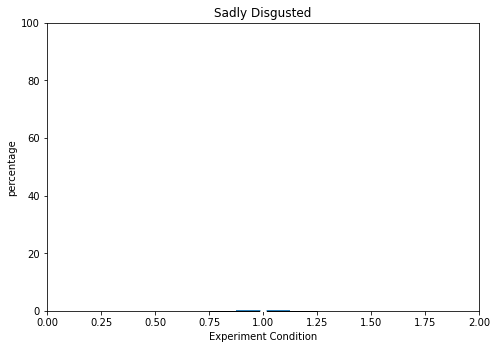

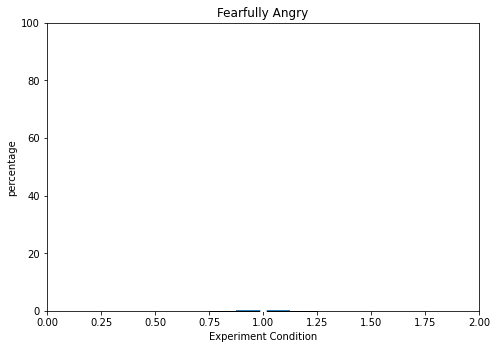

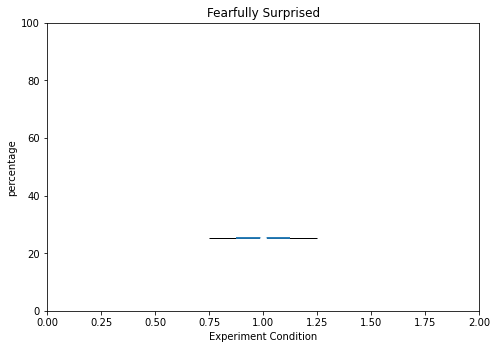

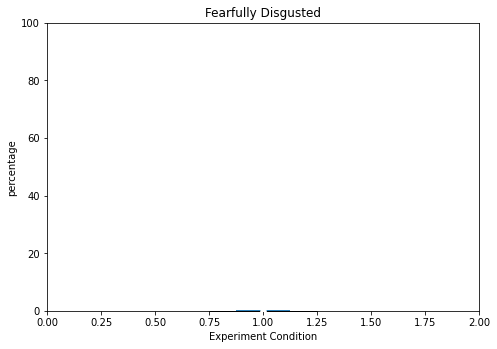

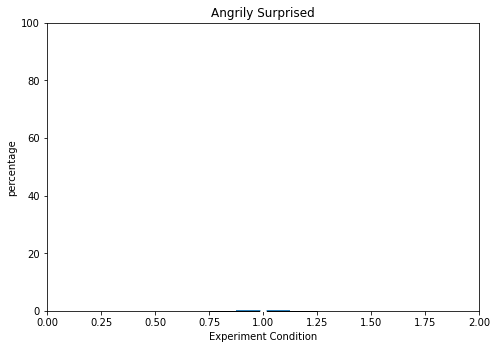

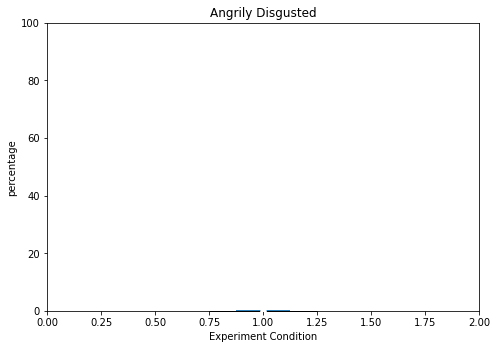

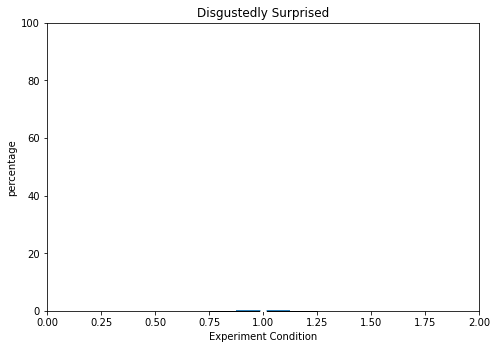

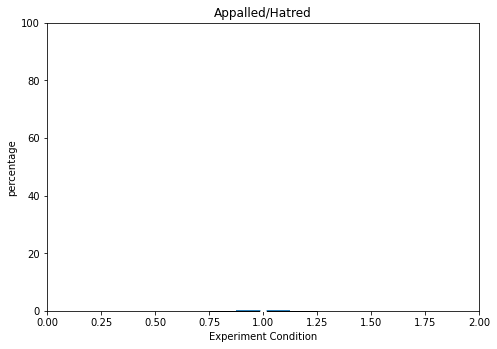

In [13]:
i = 0
for emo in emos:
    if (per[i].empty):
        c1 = [0 for n in range(n_faces)]
        c2 = [0 for n in range(n_faces)]
        c3 = [0 for n in range(n_faces)]
    else:
        c1 = [0 if math.isnan(n) else (n*100)/n_frames for n in per[i]["Cordaro_"]]
        c2 = [0 if math.isnan(n) else (n*100)/n_frames for n in per[i]["Keltner_"]]
        c3 = [0 if math.isnan(n) else (n*100)/n_frames for n in per[i]["Du_"]]
    ## combine these different collections into a list
    data_to_plot1 = [c3]
#     data_to_plot2 = [c2]
#     data_to_plot3 = [c3]

    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    parts = ax.violinplot(data_to_plot1, showmeans=False, showmedians=False, showextrema=True)
#     ax2.set_title('Customized violin plot')
#     parts = ax2.violinplot(
#             data, showmeans=False, showmedians=False,
#             showextrema=False)
#D43F3A
    for pc in parts['bodies']:
        pc.set_facecolor('white')
        pc.set_edgecolor('black')
        pc.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(data_to_plot1, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(data_to_plot1, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
    plt.ylim(0, 100)
    plt.xlim(0,2)
    plt.title(emo)
    plt.xlabel("Experiment Condition")
    plt.ylabel("percentage")
    # set style for the axes
#     labels = ['A', 'B', 'C', 'D']
#     for ax in [ax1, ax2]:
#         set_axis_style(ax, labels)

#     plt.subplots_adjust(bottom=0.15, wspace=0.05)
    plt.show()
    
#     plt.show()
    i += 1

In [14]:
print(per[1])


   face_id  Cordaro_  Keltner_  Du_
0        0        11        11   48
